In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
print("Imported the Libraries Succesfully")

Imported the Libraries Succesfully


In [8]:
df = pd.read_csv(r"C:\Users\vigee\OneDrive\ドキュメント\Model Projects\Insurance cost prediction dataset.zip")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [12]:
df[['charges']] = np.round(df[['charges']],2)
print(df)

      age     sex     bmi  children smoker     region  charges
0      19  female  27.900         0    yes  southwest  16885.0
1      18    male  33.770         1     no  southeast   1726.0
2      28    male  33.000         3     no  southeast   4449.0
3      33    male  22.705         0     no  northwest  21984.0
4      32    male  28.880         0     no  northwest   3867.0
...   ...     ...     ...       ...    ...        ...      ...
1333   50    male  30.970         3     no  northwest  10601.0
1334   18  female  31.920         0     no  northeast   2206.0
1335   18  female  36.850         0     no  southeast   1630.0
1336   21  female  25.800         0     no  southwest   2008.0
1337   61  female  29.070         0    yes  northwest  29141.0

[1338 rows x 7 columns]


C:\Users\vigee\AppData\Local\Temp\ipykernel_6472\2086196698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette = 'viridis')


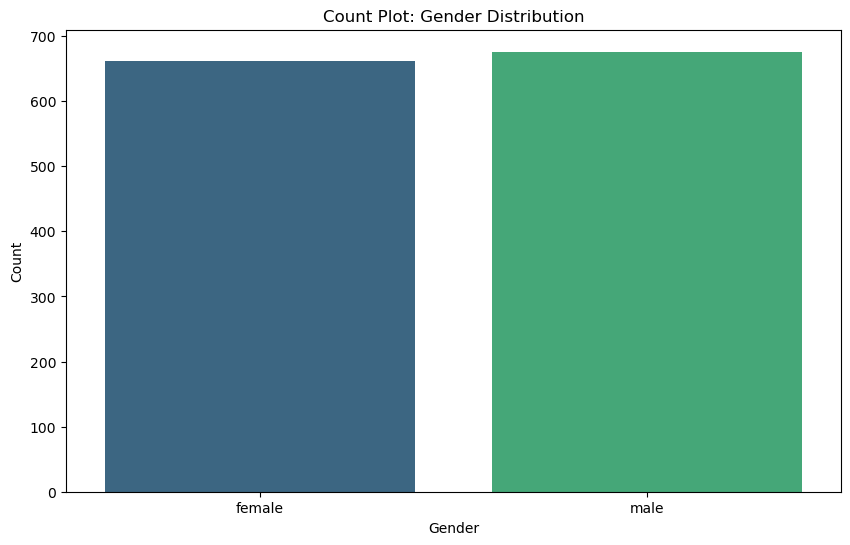

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', palette = 'viridis')
plt.title('Count Plot: Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

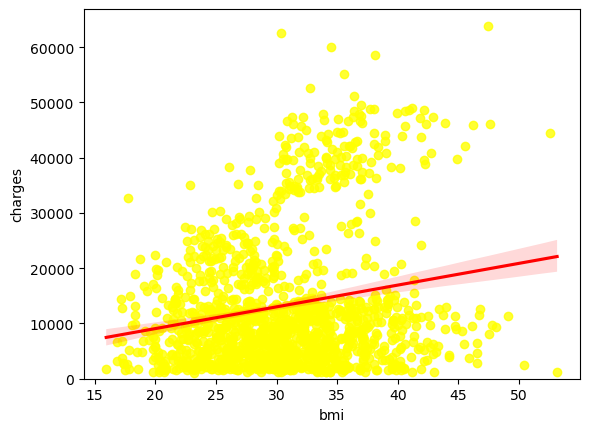

In [18]:
sns.regplot(x = 'bmi', y = 'charges', data = df, line_kws = {'color': 'red'}, scatter_kws = {'color': 'yellow'} )
plt.ylim(0,)
plt.show()

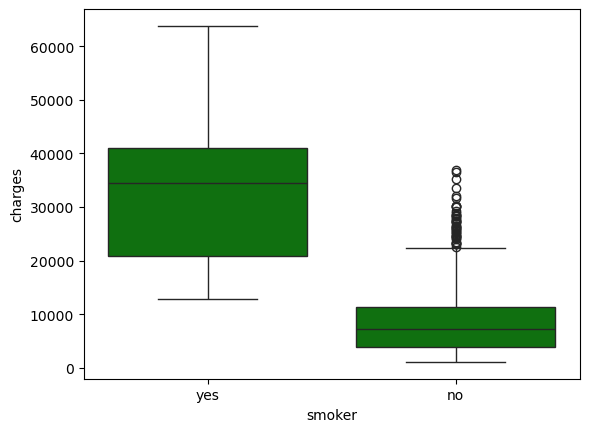

In [27]:
sns.boxplot(x = 'smoker', y = 'charges', data = df, color = 'green')
plt.show()

In [41]:
le = LabelEncoder()
x = df[['smoker']].apply(le.fit_transform)
y = df[['charges']]

lm = LinearRegression()
lm.fit(x, y)
print(lm.score(x, y))
plt.show()

0.6197647726336781


In [44]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

z = df_encoded[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df_encoded[['charges']]

lm.fit(z, y)
print(lm.score(z, y))

0.7509131165901143


In [49]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = z.astype(float)
Y = y.astype(float) 
pipe.fit(Z, Y)
ypipe=pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8477666921221835


In [50]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [51]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7623224207774725


In [52]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8624970260519874
